# Mentoría 'de cómo clasificar en géneros a las canciones'
## Práctico I : Análisis de features de audio

**Consideraciones:**
- Se evalúa el estilo y prolijidad del código.
- Se permite hacer trabajo extra, siempre y cuando las actividades básicas estén resueltas.

### Librerías

!pip3 install spotipy
!pip3 install pandas
!pip3 install seaborn
!pip3 install tqdm
!pip3 install plotly

# Agregar las librerías extra que se utilicen en esta celda y la siguiente

### Dependencias y acceso al API

In [2]:
import pandas as pd
import numpy as np
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import seaborn as sns
import matplotlib.pyplot as plt
import tqdm
import plotly.express as px
import plotly.graph_objects as go


client_id = '46b333d567314a89a6254b6c6b054be6'
client_secret = '9d922c3613e441518349dcf55f7d5853'
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)

sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)
#dir(sp)

In [3]:
sns.set_context(context='paper')

### 1) Plantear una pregunta que quieran responder con estos datos

Las preguntas pueden ser por ejemplo: 
- ¿Por qué este artista destaca dentro de su género?
- ¿Por qué no lo hace?
- ¿Por qué un género musical es más escuchado que otro?

Sin embargo, pueden usar cualquier afirmación que hayan leído en internet y que se pueda responder con los datos este trabajo para validarla o rechazarla.

### Pregunta: Qué tan bien representan las features de audio de Spotify las características de canciones experimentales?

- Cómo se comportan las features ante la música experimental? Son capaces de representar lo que se escucha o dan resultados erróneos?



### 2) Obtener datos para responder la pregunta

Para esto hay que hacer pedidos a la API para obtener una lista de canciones de sus artistas, de las cuáles se obtienen sus features de audio como en este [ejemplo](https://developer.spotify.com/console/get-audio-features-track/?id=17VP4tofJ3evJbtY8Tk1Qi) de la versión web de la API. Una vez obtenidos los datos, seleccionar un subconjunto de 5 o 6 features de audio y agrupar los datos en un [DataFrame de pandas](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html).

**Recomendación** : Usar un dataframe para su artista y otro para la competencia si es que eligierone esa opción, les va a ahorrar tiempo.

**Aclaración** : Si plantearon una pregunta que no requiera los datos de la consigna, obtengan esos datos.

Primero algunas funciones auxiliares

In [4]:
def genres_by_artist_id(id): #id: str
    artist = sp.artist(id)
    genres = artist['genres']
    return genres    #genres: List[str]

def songs_from_album_id(album_id):
    songs = []
    album = sp.album(album_id)
    artist = album['artists'][0]['name']
    for item in album['tracks']['items']:
        track = {}
        track["song_name"] = item['name']
        track["song_id"] = item['id']
        track["album_name"] = album['name']
        track["album_id"] = album["id"]
        audio_features = sp.audio_features(track["song_id"])
        track["audio_features"] = audio_features[0]
        track["artist"] = artist
        songs.append(track)
    return songs    #songs:List[dict]

def add_track(track_id, songs): #track_id:str, songs:List[dict]
    track = sp.track(track_id)
    audio_features = sp.audio_features(track_id)
    row = {}
    row["song_name"] = track['name']
    row["song_id"] = track['id']
    row["album_name"] = track['album']['name']
    row["album_id"] = track['album']['id']
    row["audio_features"] = audio_features[0]
    songs.append(row)
    return songs



Armamos el dataset.

Canciones: mother of the world, 30 red houses, Hunting down individual mosquitoes, 
            Oral couture, Turbo Olé, Ceaseless Suffering, 
            The Wolf, Aorta, Declare Independence,
            sin rumbo, Anger, Soichiro,
            No Love, Hunger Games, Double Helix,
            Hacker, Black paint, Visceras,
            Micro, 1 hour white noise, Peg,
            Alice, Woodpecker No 1, Tokyo times ten,
            Data.Duplex, Data.Syntax, 5 movements for string quartet, op.5: 1.heftig bewegt,
            Pierrot Lunaire, Op. 21:VIII. Die Nacht, Metastaseis, Horses,
            Heavy Water/I'd rather be sleeping
            

In [12]:
select_dataset = []
select_tracks = ["5zNQPB67iLm11Zyg6hwiQX","1X8VjdoPONsFDepJcmvz3E","26pTHO6oeJwjacJFhDzqVl",
          "6ZzpYaAQVvRKwFtMej9OEM","5ecFLLkXuMdZgLYihUfFGk", "2eL3QVjeJF9KhpYkVxjLUA",
          "1YJ264vuusaeDpbe8BKpBP", "0UxLfXmjXU5qoRFL25n5lA", "7gy9d7iBHW9BWhMNPjHuFf",
          "0aL27vskbMpwsMGUkHm3Zf", "1QofoyawKCfWd5lZXwE02k", "4zsfqkM7X1ZYcMAXpGkOO5",
          "5fDj1YVNR04RtQNP4iYapO", "3Pt8XN6zWFmW2ShLna8Ttb", "2SWHZzjaqBuWYUUuxjdeBG",
          "7y8X0Z04gJCKtfrnSAMywJ", "2yY0LXGpN7U2y5tbagNnXq", "1IDi1OjPT8y7MmNflRYMHO",
          "32IPwbBBWJzubJAAZeVx0x", "7Ipe9FfRceDN51YMyd99pO", "2DYxoQbcgjuduAYb98SVLj",
          "7n6WNQidHGzHm0TQHWV7aH", "4UO1pfxi5fDbxshrwwznJ2", "2GgN9rZOpMMGoGVxK9jRxf",
          "6f41Dmik9o6ByGCCe6AJR1", "1C811u2Eqsp6IWki8HyIJC", "5xFWfrJXy7WLdNrioyjUmt",
          "7oTjhU3qCmmXxGR3zi5H2L", "1efDBHuz4k6Zei6chsAwfq", "3e20AQb9sMo23KokSqBrBY",
          "6IUwiHsyKAZtfBy37Wu4ij",
         ]
for track in tqdm.tqdm(select_tracks):
    add_track(track,select_dataset)

100%|██████████| 31/31 [00:16<00:00,  1.86it/s]


In [17]:
tracks = []
for song in tqdm.tqdm(select_dataset):
    tracks += songs_from_album_id(song['album_id'])


100%|██████████| 31/31 [01:43<00:00,  3.35s/it]


Armamos los dataframes

In [18]:
songs = pd.DataFrame(tracks)
audio_features_base = pd.DataFrame(list(songs["audio_features"].values))

Let's see how the artists are distributed on our dataset

<Figure size 1080x432 with 0 Axes>

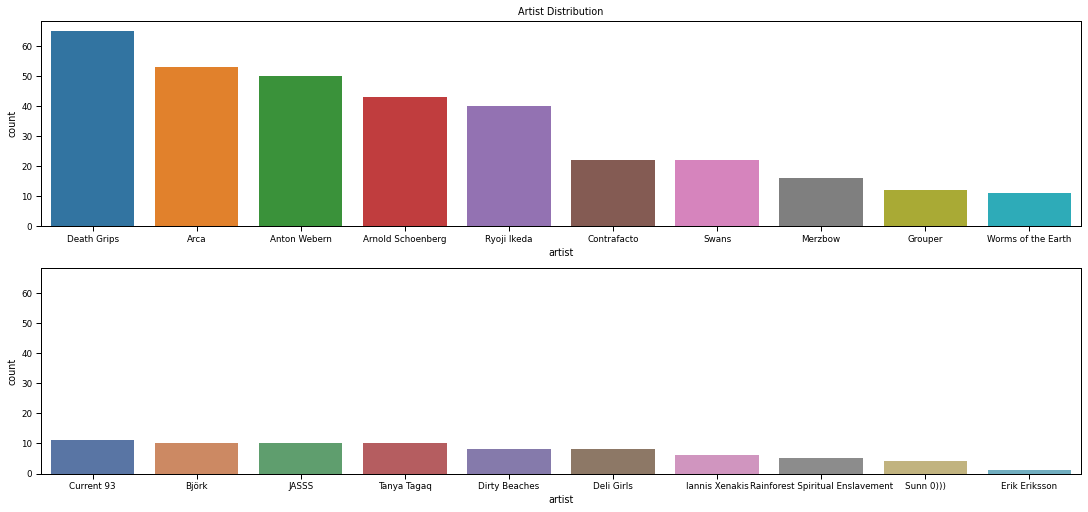

In [20]:
artist_counts = songs.artist.value_counts()
artist_counts_df = pd.DataFrame({'artist':artist_counts.index,'count':artist_counts.values})#.columns
plt.figure(figsize=(15, 6))
fig, ax =plt.subplots(2,1,constrained_layout=True, figsize=(15,7),sharey=True)
sns.barplot(x = 'artist', y ='count', ax=ax[0],data=artist_counts_df.head(10))
ax[0].set_title("Artist Distribution")
sns.barplot(x = 'artist', y ='count', ax=ax[1],data=artist_counts_df.tail(10),palette="deep")

In [23]:
description_base = audio_features_base.describe()
description_base

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
count,407.000000,407.000000,4.070000e+02,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000
mean,0.430762,0.382514,2.644464e+05,0.489696,0.383935,5.159705,0.211270,-15.683585,0.631450,0.119341,114.136197,3.756757,0.224584
std,0.399115,0.189975,2.914635e+05,0.346484,0.398867,3.716764,0.176916,11.696782,0.483005,0.120746,35.433945,0.849397,0.207839
min,0.000001,0.000000,1.436000e+04,0.000066,0.000000,0.000000,0.037300,-47.435000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.029400,0.231000,1.325000e+05,0.142000,0.000065,1.000000,0.101000,-23.643500,0.000000,0.041950,85.672000,4.000000,0.055350
50%,0.303000,0.364000,2.011740e+05,0.534000,0.206000,5.000000,0.128000,-11.717000,1.000000,0.058500,111.294000,4.000000,0.154000
75%,0.893500,0.546000,2.880010e+05,0.811000,0.823000,9.000000,0.275000,-6.592000,1.000000,0.155000,138.404500,4.000000,0.369000
max,0.995000,0.924000,3.631718e+06,1.000000,1.000000,11.000000,0.934000,5.118000,1.000000,0.810000,203.224000,5.000000,0.983000


From the available features to analyse, I chose (quoted phrases from [spotify's documentation](https://developer.spotify.com/documentation/web-api/reference/tracks/get-several-audio-features/)):

- **energy**: [float] "Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy."

- **tempo**: [float] "The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration."

- **valence**: [float] "A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry)."

- **danceability**: [float] "Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable." That means we can interpret danceability as **regularity** in the context of experimental music.

- **instrumentalness**: [float] "Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0."

- **speechiness**: [float] "Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks."

In [24]:
features = ["speechiness", "instrumentalness", "danceability", "valence", "energy"]

### 3) Hacer un gráfico de estilo [radar chart](https://en.wikipedia.org/wiki/Radar_chart)  comparando a su artista o banda con 'la competencia'
En esta parte tienen que hacer los gráficos tomando como parámetros las features de audio que eligieron. Pueden usar la librería que quieran para hacer los gráficos.

**Recomendaciones** : 
- Hacer ambos gráficos en una misma figura.
- Antes de graficar, obtener los valores medios o medianos para los valores de las features. 
- Chequear los rangos de valores para cada feature antes de hacer los gráficos.

**Aclaración**: pueden usar otro tipo de gráfico si lo consideran particularmente útil para resolver su pregunta.

First we calculate the ranges of the audio features

In [25]:
ranges_base = pd.concat([pd.DataFrame(description_base.loc['max']),pd.DataFrame(description_base.loc['min'])],axis=1)
ranges_base

,max,min
acousticness,0.995,0.000001
danceability,0.924,0.000000
duration_ms,3631718.000,14360.000000
energy,1.000,0.000066
instrumentalness,1.000,0.000000
key,11.000,0.000000
liveness,0.934,0.037300
loudness,5.118,-47.435000
mode,1.000,0.000000
speechiness,0.810,0.000000


Let's keep the features we will analyse only

In [26]:
audio_features = audio_features_base[features]
ranges = ranges_base.loc[features]
description = description_base[features]
description

,speechiness,instrumentalness,danceability,valence,energy
count,407.000000,407.000000,407.000000,407.000000,407.000000
mean,0.119341,0.383935,0.382514,0.224584,0.489696
std,0.120746,0.398867,0.189975,0.207839,0.346484
min,0.000000,0.000000,0.000000,0.000000,0.000066
25%,0.041950,0.000065,0.231000,0.055350,0.142000
50%,0.058500,0.206000,0.364000,0.154000,0.534000
75%,0.155000,0.823000,0.546000,0.369000,0.811000
max,0.810000,1.000000,0.924000,0.983000,1.000000


In [27]:
#aux functions
def track_by_feature(feature, value):
    track_id = audio_features_base[audio_features_base[feature]==value]['id']
    track_id = track_id.values.item(0)
    return songs[songs['song_id']== track_id]
#example use: 
#track_by_feature("acousticness",0.950000)
#track_by_feature("liveness",0.041200)

def songs_of_description(statistic):
    row = description.loc[statistic]
    keys = row.keys()
    tracks_of_row = []
    for key in keys:
        track = track_by_feature(key,row[key]).to_dict()['song_name']
        track = list(track.values())[0]
        tracks_of_row.append({key: track})
    return tracks_of_row


Let's see which songs had the hightest and the lowest scores

In [28]:
songs_of_description("min")

[{'speechiness': '5 Pieces For Orchestra: 1. Bewegt'},
 {'instrumentalness': '30 Red Houses'},
 {'danceability': '5 Pieces For Orchestra: 1. Bewegt'},
 {'valence': '5 Pieces For Orchestra: 1. Bewegt'},
 {'energy': 'White Noise 1 Hour Long'}]

In [29]:
songs_of_description("max")

[{'speechiness': 'Here We Go Again'},
 {'instrumentalness': 'White Noise 1 Hour Long'},
 {'danceability': 'Money'},
 {'valence': 'True Blue'},
 {'energy': 'Woodpecker No. 2'}]

## Let's see how the songs' features are **distributed**

<Figure size 1080x720 with 0 Axes>

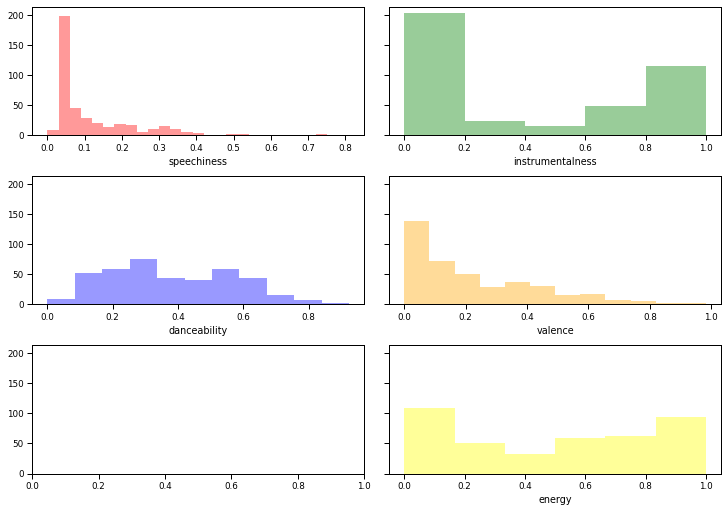

In [31]:
plt.figure(figsize=(15, 10))
fig, ax =plt.subplots(3,2,constrained_layout=True, figsize=(10,7),sharey=True)
sns.distplot(audio_features["speechiness"],ax=ax[0,0],color="red", kde=False, norm_hist=False)
sns.distplot(audio_features["instrumentalness"],ax=ax[0,1],color="green", kde=False, norm_hist=False)
sns.distplot(audio_features["danceability"],ax=ax[1,0],color="blue", kde=False, norm_hist=False)
sns.distplot(audio_features["valence"],ax=ax[1,1],color="orange", kde=False, norm_hist=False)
sns.distplot(audio_features["energy"],ax=ax[2,1],color="yellow", kde=False, norm_hist=False)

We can see that given a song of the dataset, there's a high probability that the song:
* will not be considered **speechy** by spotify, its low value meaning it shouldn't be music not predominently vocal (like rap, etc)
* there's a 50/50 probability of the song to be considered instrumental or not;
* it will rank above average in the **danceability** score, meaning it's probably considered as rhythmically stabile, with strong beats and overall regular;
* will rank low on the **valence** score, meaning spotify classifies it as sad/depressive/negative;
* it's **tempo** will be around 120 bpm (note: the average pop song has a tempo of [116 beats per minute](https://www.washingtonpost.com/news/to-your-health/wp/2015/10/30/the-mathematical-formula-behind-feel-good-songs/));
* its **energy** will be catalogued as high, meaning it is probably entropic, loud for spotify.

## Notable cases by artist

In [139]:
#aux func
def audio_by_artist(artist_name):
    artist = songs[songs["artist"]==artist_name]
    artist_audio = pd.DataFrame(list(artist.audio_features.values))
    return artist_audio

def dist_by_artist(artist_name):
    artist = songs[songs["artist"]==artist_name]
    artist_audio = pd.DataFrame(list(artist.audio_features.values))

    plt.figure(figsize=(15, 10))
    fig, ax =plt.subplots(3,2,constrained_layout=True, figsize=(10,7),sharey=True)
    sns.distplot(artist_audio["speechiness"],ax=ax[0,0],color="red", kde=False, norm_hist=False)
    sns.distplot(artist_audio["instrumentalness"],ax=ax[0,1],color="green", kde=False, norm_hist=False)
    sns.distplot(artist_audio["danceability"],ax=ax[1,0],color="blue", kde=False, norm_hist=False)
    sns.distplot(artist_audio["valence"],ax=ax[1,1],color="orange", kde=False, norm_hist=False)
    sns.distplot(artist_audio["energy"],ax=ax[2,1],color="yellow", kde=False, norm_hist=False)
    return artist_audio

### The dirty beaches case

<Figure size 1080x720 with 0 Axes>

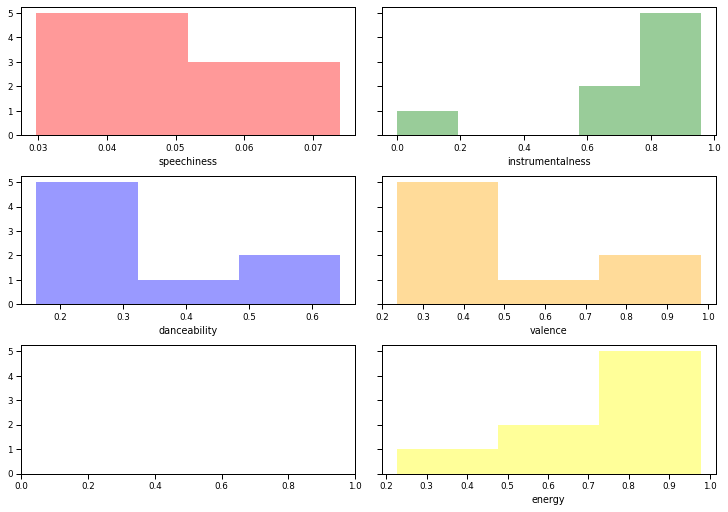

In [62]:
dirty_beaches_audio = dist_by_artist("Dirty Beaches")

#### Obs
None of the songs by Dirty Beaches are instrumental, in fact they rely very heavily on vocals. But the genre they belong to and their style involves heavy distortion

### The Tanya Tagaq case

<Figure size 1080x720 with 0 Axes>

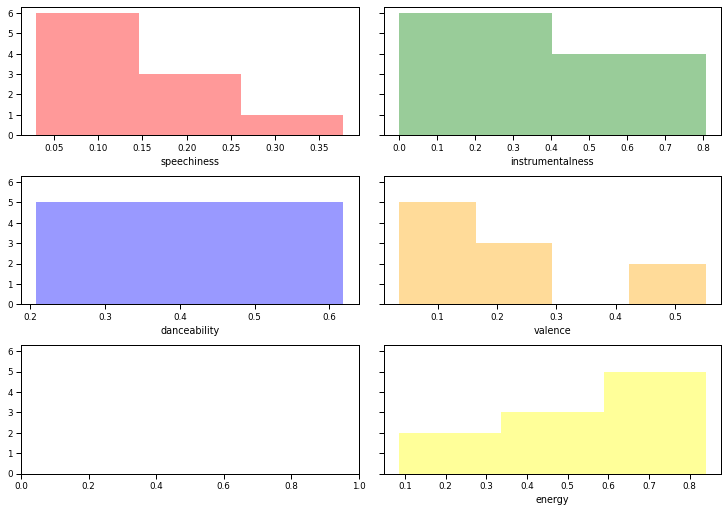

In [34]:
tanya_audio = dist_by_artist("Tanya Tagaq")

#### Obs
Tanya's work relies heavily on vocal singing and experimentation. Her vocal style is inspired by inuit traditional music, yet Spotify's clearly identifies her work as instrumental.

### The Merzbow Case
TODO: check if most songs here are instrumental, spotify classifies it as 5050

<Figure size 1080x720 with 0 Axes>

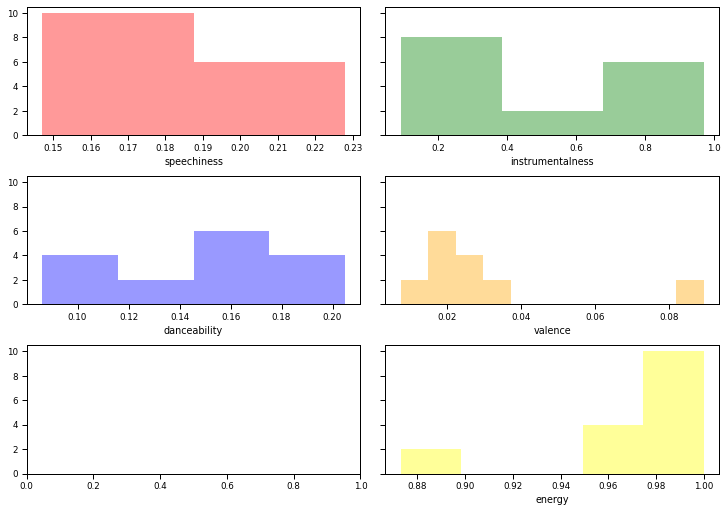

In [36]:
#songs[songs["artist"]=="Death Grips"]
merzbow_audio = dist_by_artist("Merzbow")


### Let's draw and analyse some radar charts

TODO:
- sacar means de c/feature por artista
- graficarlas en un radar chart
- comparar con popularidad

In [145]:
merzbow_desc = merzbow_audio[features].describe()
tanya_desc = tanya_audio[features].describe()
dirty_beaches_desc = dirty_beaches_audio[features].describe()
merzbow_means = list(merzbow_desc.loc["mean"])
tanya_means = list(tanya_desc.loc["mean"])
dirty_means = list(dirty_beaches_desc.loc["mean"])

In [147]:
df = pd.DataFrame(dict(
    r=tanya_means,
    theta=features,
    artist="Tanya Tabaq"))
df2 = pd.DataFrame(dict(
    r=merzbow_means,
    theta=features,
    artist="Merzbow"))
df3 = pd.DataFrame(dict(
    r=dirty_means,
    theta=features,
    artist = "Dirty Beaches"))
fig = px.line_polar(df, r='r', theta='theta', line_close=True, labels=features,hover_name=df.artist)
fig.update_traces(line=dict(color="RoyalBlue"))
fig.add_trace(px.line_polar(df2, r='r', theta='theta', line_close=True,hover_name=df2.artist).data[0])
fig.update_traces(line=dict(color="crimson"))
fig.add_trace(px.line_polar(df3, r='r', theta='theta',line_close=True,hover_name=df3.artist).data[0])
fig.update_layout(title='Tanya vs Death Grips vs Dirty Beaches')


In [150]:
def make_radar(artist_name):
    artist_audio = audio_by_artist(artist_name)
    artist_desc = artist_audio[features].describe()
    artist_means = list(artist_desc.loc["mean"])
    df = pd.DataFrame(dict(
        r=artist_means,
        theta=features,
        artist=artist_name))
    fig = px.line_polar(df, r='r', theta='theta', line_close=True,hover_name=df.artist)
    return fig

fig = make_radar("Death Grips")
fig2 = make_radar("Arca")
fig3 = make_radar("Anton Webern")
fig.add_trace(fig2.data[0])
fig.add_trace(fig3.data[0])
fig.update_layout(title='Death Grips vs Arca vs Anton Webern')


In [173]:
fig = make_radar("Contrafacto")
fig2 = make_radar("Swans")
fig3 = make_radar("Merzbow")
fig.add_trace(fig2.data[0])
fig.add_trace(fig3.data[0])
fig.update_layout(title='Contrafacto vs Swans vs Merzbow')

In [159]:
fig = make_radar("Erik Eriksson")
fig.show()

### 4) Escribir un informe

Este informe tiene que describir qué datos que obtuvieron, el volumen de estos (# de canciones del artista, # de canciones de la competencia, etc), una explicación de cómo estos se relacionan con la pregunta planteada, cómo ayudan a responderla y los resultados que obtuvieron. Usar la celda de abajo con formato markdown.




In [ ]:
genres_by_artist_id("7JRs0G0kHZTBs0Lo7qOjL8")

### Question: How well do Spotify's audio features represent experimental songs' characteristics?

- How do these features behave against experimental music? 
- Are Spotify's audio features capable of describing experimental music? do they make mistakes? are them meaningful?

In order to investigate this, I made a first, small dataset with 31 handpicked songs, which I knew before hand and would expect to be challenging for any cataloguer; they represent different types of sound experimentation.
In this dataset there are songs like:
Entre las canciones hay cosas como
* White noise
* Dodecaphonic and Serialist music,
* Noise y Harsh Noise,
* indie,
* drone, avant-garde metal,atmospheric black metal,
* Predominantly vocal music, throat singing,
* experimental electronic,
* art pop, Experimental pop,
* synth punk,
* Minimal music,
* Ambient.

With that as a base I made a final dataset, with the songs belonging to the albums of the tracks of the smaller dataset.
The artists' distribution in the dataset was plotted in previous analysis, but as a reminder:

In [176]:
artist_counts

Death Grips                         65
Arca                                53
Anton Webern                        50
Arnold Schoenberg                   43
Ryoji Ikeda                         40
Contrafacto                         22
Swans                               22
Merzbow                             16
Grouper                             12
Worms of the Earth                  11
Current 93                          11
Björk                               10
JASSS                               10
Tanya Tagaq                         10
Dirty Beaches                        8
Deli Girls                           8
Iannis Xenakis                       6
Rainforest Spiritual Enslavement     5
Sunn 0)))                            4
Erik Eriksson                        1
Name: artist, dtype: int64

## Features

From the audio features that Spotify provides us through the API, I chose to focus on

- speechiness
- instrumentalness
- danceability
- valence
- energy

since they seemed like the most sbujective to me, specially in the case of non mainstream music; what would danceability mean for a dodecaphonic piece? What is the valence of a minimal song? what is the energy of a noise song? the instrumentalness of voice sampling? speechiness of throat singing?

Based on this large, base dataset I calculated the mean of the chosen features across the tracks in the dataset. Based on that I investigated this dataset's performance with radar charts. 

### Global minimums

Anton Webern's **"5 Pieces For Orchestra: 1. Bewegt"** represented a minimum for 3 out of 5 features.
This short dodecaphonic, serialist piece has the lowest scores for speechiness, danceability and valence. This piece last two features' performance interestly correspond with mainstream perception of dodecaphonic music. Even if no somber, dark undertones, its formal guidelines for writing music are easily interpreted as such by public ears'. Its unique take on tempo and key correspond to atonality's expressive interests present innovative forms of regularities, which spotify has labeled "danceability".
It's of interest to compare Webern's performance against a pure White Noise song.

In [234]:
webern = pd.DataFrame(list(track_by_feature("valence",0.000000)["audio_features"].values))
webern

,acousticness,analysis_url,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence
0,0.868,https://api.spotify.com/v1/audio-analysis/41Et...,0,58000,0.0048,41EthquhsktiXzkDjzlyA6,0.026,9,0.111,-41.086,1,0,0,0,https://api.spotify.com/v1/tracks/41Ethquhskti...,audio_features,spotify:track:41EthquhsktiXzkDjzlyA6,0


In [243]:
webern_popularity = sp.track("41EthquhsktiXzkDjzlyA6")['popularity']
print("Webern's 5 pieces for orchestra popularity :", webern_popularity)

Webern's 5 pieces for orchestra popularity : 2


In [238]:
white_noise = audio_features_base[audio_features_base["uri"]=="spotify:track:00DVtdi8lE9em4GdOADTvH"][features]
white_noise

,speechiness,instrumentalness,danceability,valence,energy
0,0.0354,0.0803,0.259,0.0377,0.408
48,0.0354,0.0803,0.259,0.0377,0.408


In [240]:
white_noise_popularity = sp.track("00DVtdi8lE9em4GdOADTvH")['popularity']
print("White noise popularity: ",white_noise_popularity)

White noise popularity:  30


In [213]:
audio_features_base[audio_features_base["uri"]=="spotify:track:7Ipe9FfRceDN51YMyd99pO"][features]


,speechiness,instrumentalness,danceability,valence,energy
219,0.143,1.0,0.124,0.00001,0.000066


In [215]:
audio_features_base.describe()[features]

,speechiness,instrumentalness,danceability,valence,energy
count,407.000000,407.000000,407.000000,407.000000,407.000000
mean,0.119341,0.383935,0.382514,0.224584,0.489696
std,0.120746,0.398867,0.189975,0.207839,0.346484
min,0.000000,0.000000,0.000000,0.000000,0.000066
25%,0.041950,0.000065,0.231000,0.055350,0.142000
50%,0.058500,0.206000,0.364000,0.154000,0.534000
75%,0.155000,0.823000,0.546000,0.369000,0.811000
max,0.810000,1.000000,0.924000,0.983000,1.000000


In [178]:
songs_of_description("min")

[{'speechiness': '5 Pieces For Orchestra: 1. Bewegt'},
 {'instrumentalness': '30 Red Houses'},
 {'danceability': '5 Pieces For Orchestra: 1. Bewegt'},
 {'valence': '5 Pieces For Orchestra: 1. Bewegt'},
 {'energy': 'White Noise 1 Hour Long'}]

In [179]:
songs_of_description("max")

[{'speechiness': 'Here We Go Again'},
 {'instrumentalness': 'White Noise 1 Hour Long'},
 {'danceability': 'Money'},
 {'valence': 'True Blue'},
 {'energy': 'Woodpecker No. 2'}]